In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [10]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 11px;
</style>

In [ ]:
#Written by :  Mohammad Moezzibadi (SDG3 et SDG4)
#Scraping WOS from university of strasbourg portal
import time
from bs4 import BeautifulSoup
#----
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import re
import json #pour stocker et importer la liste à chaque fois que le code se lance
#-----------------------------Timer---------------------------------#
from datetime import datetime
from threading import Timer

def TROUVE_ENVOI():
         
    ##-----Disable asking notification in chrome------
    options = webdriver.ChromeOptions()
    options.add_argument('--disable-notifications')
        
    ##Pour Windows il faut inclure votre emplacement ChromeDriver dans votre variable d’environnement PATH
    #browser=webdriver.Chrome(executable_path=r'/usr/local/bin/chromedriver')
    ##Pour Mac
    browser = webdriver.Chrome(ChromeDriverManager().install(), options=options)
    ##------------------------------------------------
    browser.implicitly_wait(10)
    browser.get("https://bu.unistra.fr/opac/")
    time.sleep(3)
    
    WebDriverWait(browser, 5).until(EC.element_to_be_clickable((By.XPATH,'//*[@id="ps_tmatl"]'))).click()
    
    message = "web of science – core collection"
    time.sleep(3)
    message_box = browser.find_element_by_xpath('//*[@id="psricerca"]/form/div[1]/label/input')
    message_box.send_keys(message)
    time.sleep(10)
    Envoi = browser.find_element_by_xpath('/html/body/div[1]/div[1]/div/div[2]/div[2]/form/div[2]/button')
    browser.execute_script("arguments[0].click();", Envoi)
    Envoi.click()
    
    clicker=browser.find_element_by_xpath('//*[@id="pagedocument"]/div[1]/table/tbody/tr[1]/td[2]/table/tbody/tr[4]/td/ul/li[1]/a')
    clicker.click()
       
    time.sleep(3)
    browser.switch_to.window(browser.window_handles[1])
    time.sleep(3)
    user_id = "..."
    element = browser.find_element_by_xpath("//*[@id='username']")
    element.send_keys(user_id)
    time.sleep(3)
    password = "..."
    passwor = browser.find_element_by_xpath("//*[@id='password']")
    passwor.send_keys(password)
    time.sleep(3)
    clicker = browser.find_element_by_xpath('//*[@id="login-btn"]')
    clicker.click()
    clicker = browser.find_element_by_xpath('//*[@id="snSearchType"]/div[2]/a')
    clicker.click()
    time.sleep(3)
    clicker = browser.find_element_by_xpath('/html/body/app-wos/div/div/main/div/app-input-route/app-search-home/div[2]/div/app-input-route/app-search-advanced/app-advanced-search-form/form/div[2]/app-search-row/div/div[1]/app-select-search-field/wos-select/button')
    clicker.click()
    time.sleep(3)
    clicker = browser.find_element_by_xpath('//*[@id="global-select"]/div/div[2]/div[2]')
    clicker.click()
    message = '(TS = ( (( "inclusi*" OR "equit*" ) AND ( "quality education" )) ) OR\
    TS = ( (( "Quality" OR "equitabl*" OR "free" OR "access" OR "affordab*") NEAR/3 \
    ( "Primary education" OR "primary school" OR "secondary education" OR "secondary school")) ) OR\
    TS = ( ( "proficiency level" NEAR/3 ( "reading" OR "mathematics" )) )\
    OR TS = ( ( "Quality" OR "equitabl*" OR "free" OR "access" OR "affordab*") NEAR/3 \
    ( "preschool" OR "pre-school" OR "pre-primary education" OR "pre-primary school" OR "preprimary education" OR "preprimary school") )\
    OR TS = ( ("equal" OR "equit*") NEAR/3 ("access") NEAR/3 ("tertiary education" OR "university" OR "vocational education" ) )\
    OR TS = ( (( "increas*" NEAR/3 ("skills" OR "competenc*")) AND ( "employ*" OR "decent job*" OR "entrepreneur*" )) )\
    OR TS = ( ( ("gender disparit*" OR "gender parit*" OR "gender inequalit*" OR "gender equalit*") AND "educat*") ) OR\
    TS = ( ( ( "vulnerable" OR "disabilit*" OR "disabled" OR "indigen*" ) NEAR/3 "educat*" ) ) OR\
    TS = ( ( ( "girl*" OR "women" ) AND ( "equal*" NEAR/3 "educat*" )) )\
    OR TS = ("literacy" OR "numeracy" OR "reading skill*" OR "writing skill*" )\
    OR TS = (( ( "sustainable development" ) NEAR/3 ( "educat*" OR "teach*" OR "learn*" ) ) ) OR\
    TS = (( "sustainab*" OR "global citizenship") NEAR/3 ( "education" ) NEAR/3 ( "program*" OR "curricul*" OR "policy" OR "policies" ) )\
    OR TS = (("school facilit*") ) OR TS = (( "school*" ) NEAR/3 ( "access" ) NEAR/3 ( "electricity" OR "internet" OR "computer*" ) ) OR\
    TS = (( "school*" ) NEAR/3 ( "drinking water" OR "sanitation" OR "handwashing*" OR "hand washing*") )\
    OR TS = (( "scholarships" ) AND ( "develop* countr*" OR "least developed countr*" OR "small island*" ) ) OR\
    TS = (( "scholarships" ) NEAR/6 ( "South Africa" OR "Sub-Saharan Africa" OR "Equatorial Africa" OR "West Africa" ) )\
    OR TS = ( (( "teacher*" ) NEAR/3 ("training" OR "qualified" OR "education") ) \
    AND ( "develop* countr*" OR "least developed countr*" OR "small island*" ) ))'
    
#SDG3    #message = '(TS =  ( ("reduce" OR "end" OR "ending" OR "ratio") NEAR/3 ( ( "maternal" NEAR/3 ("mortality" OR "death*") ) ) ) OR TS =  ( ( ("reduce" OR "end" OR "ending" OR "prevent*" OR "ratio*") NEAR/3 (("neonatal" OR "under-five" OR ( "under" NEAR/2 ("5" OR "five") ) OR "before fifth") NEAR/3 ("mortality" OR "death*") ) ) )\
    #OR TS =  ( ("epidemic" OR "pandemic" OR "combat" OR "fight") NEAR/3 ( "tuberculos*" OR "malaria" OR "hepatit*" OR "HIV" OR "AIDS" OR "tropical disease*" OR "Zika*" OR "Zikv*" OR "Ebola*" OR "water-borne disease*" OR "communicable disease*" OR "neglected disease*" OR "dengue" OR "Chagas*" OR "trypanosom*" OR ("COVID19" OR "COVID-19" OR "2019-nCoV" OR "SARS-CoV-2" OR "SARS-CoV2" OR "HCoV-2019" OR "hcov" OR "NCOVID-19" OR "severe acute respiratory syndrome coronavirus 2" OR "severe acute respiratory syndrome corona virus 2" OR "coronavirus" OR "corona virus") ) )\
    #OR TS =  ( ("cardiovascular disease*" OR "heart attack*" OR "stroke" OR "myocard* infarct*" OR "cerebrovascular accident*" OR "cva" OR "cva" OR "cancer*" OR "neoplasm*" OR "tumor*" OR "tumour*" OR "carcinoma*" OR "chronic obstructive pulmonary disease*" OR "copd" OR "coad" OR "lung emphysema*" OR ("bronchitis" NEAR/3 "chronic") OR "asthma*" OR "diabetes mellitus" OR "diabetes insipidus") AND ("premature" NEAR/3 ("mortality" OR "death*")) ) OR\
    #TS =  ( ("cardiovascular disease*" OR "heart attack*" OR "stroke" OR "myocard* infarct*" OR "cerebrovascular accident*" OR "cva" OR "cva" OR "cancer*" OR "neoplasm*" OR "tumor*" OR "tumour*" OR "carcinoma*" OR "chronic obstructive pulmonary disease*" OR "copd" OR "coad" OR "lung emphysema*" OR ("bronchitis" NEAR/3 "chronic") OR "asthma*" OR "diabetes mellitus" OR "diabetes insipidus") AND ("mortality rate") ) OR\
    #TS =  ( ("cardiovascular disease*" OR "heart attack*" OR "stroke" OR "myocard* infarct*" OR "cerebrovascular accident*" OR "cva" OR "cva" OR "cancer*" OR "neoplasm*" OR "tumor*" OR "tumour*" OR "carcinoma*" OR "chronic obstructive pulmonary disease*" OR "copd" OR "coad" OR "lung emphysema*" OR ("bronchitis" NEAR/3 "chronic") OR "asthma*" OR "diabetes mellitus" OR "diabetes insipidus") AND ("suicid*") )\
    #OR TS =  ( ( ("abuse" OR "harmful use" OR "addict*") NEAR/3 ("substance*" OR "drug*" OR "alcohol" ) ) NEAR/3 ( "prevention" OR "treatment" ) ) OR\
    #TS =  ( ("binge drinking") NEAR/3 ( "prevention" OR "treatment" ) ) OR\
    #TS =  ( ( ("abuse" OR "harmful use" OR "addict*") NEAR/3 ("alcohol" ) ) AND ( "per capita" ) )\
    #OR TS =  ( (( "road" NEAR/3 "traffic" ) OR ("drunk driv*")) NEAR/3 ( "injur*" OR "death*" OR "accident*" OR "trauma*" ) )\
    #OR TS =  ( ("Access" OR ("national" NEAR/3 "strategy*" OR "program*")) AND ("Sexual health care" OR "Sexual healthcare" OR "Reproductive health care" OR "Reproductive healthcare") ) OR\
    #TS =  ( ("family planning" OR "unintended pregnanc*" OR "unwanted pregnanc*" OR "unintended motherhood") ) OR\
    #TS =  ( ("adolescen*" OR "teen*") NEAR/3 ("birth rate" OR "pregnan*" OR "mother*") )\
    #OR TS =  ( ("universal health coverage" OR (("essential") NEAR/3 ("healthcare" OR "health care" OR "medicine*" OR "vaccine*"))) ) OR\
    #TS =  ( ( ( "household expenditure" ) NEAR/3 ( "health" ) ) )\
    #OR TS =  ( (("mortality" OR "death*" OR "illness*") NEAR/3 ("poison*" OR "pollut*" OR "contaminat*") NEAR/3 ("air" OR "water" OR "soil" OR "hazardous chemical*") ) ) OR\
    #TS =  ( (("mortality" OR "death*" OR "illness*") NEAR/6 ("unsafe" OR "inadequate") NEAR/3 ("water" OR "sanitation") ) ) OR\
    #TS =  ( (("mortality" OR "death*" OR "illness*") NEAR/3 ("uninten*") NEAR/3 ("poison*" ) ) )\
    #OR TS =  ( ( "tobacco" NEAR/6 "control*" ) OR ( "health" NEAR/3 "smoking" ) OR (("smoking") NEAR/3 ("cessation" OR "quit*") NEAR/3 ( "health" OR "benefit*" )) ) OR\
    #TS =  ( (("tobacco" OR "smoking") NEAR/3 ("age") NEAR/3 ("prevalen*" OR "number*")) ) OR\
    #TS =  (("research and development" OR "R-D") NEAR/3 ("medicine*" OR "vaccin*") ) OR TS =  (("affordab*") NEAR/3 ("medicine*" OR "vaccin*") ) OR\
    #TS =  (("access*") NEAR/3 ("essential") NEAR/3 ("medicine*" OR "vaccin*") ) OR\
    #TS =  ((("develop*" NEAR/3 "assist*") NEAR/3 (("medical research") OR ("health sector*")) ) ) OR\
    #TS =  ( ( "health" NEAR/3 ( "financing" OR "recruit*" OR "development" OR "training" )) AND ("developing countr*") ) OR\
    #TS =  ( ( "health worker*" NEAR/3 ( "density" OR "distribution" )) AND ("developing countr*") ) OR\
    #TS =  ( ( ( "early" NEAR/3 "warning" ) OR ( "risk" NEAR/3 "reduction" ) OR ( "risk" NEAR/3 "management" ) ) NEAR/3 ("health") ) OR\
    #TS =  ( ("International Health Regulations") OR (("health emergenc*") NEAR/3 ("prepar*")) ))'
    
    message_box = browser.find_element_by_xpath('//*[@id="advancedSearchInputArea"]')
    message_box.send_keys(message)
    time.sleep(3)
    button = browser.find_element_by_xpath('/html/body/app-wos/div/div/main/div/app-input-route/app-search-home/div[2]/div/app-input-route/app-search-advanced/app-advanced-search-form/form/div[4]/div[1]/div[1]/div/button[2]')
    browser.execute_script("arguments[0].click();", button)
    Num_pages = browser.find_element_by_xpath('/html/body/app-wos/div/div/main/div/app-input-route/app-base-summary-component/div/div[2]/app-page-controls[1]/div/form/div/span').text
    Num_pages = Num_pages.replace(',', '')
    print('Number of pages is',Num_pages)
    #If needed it is interrupted
    browser.get('https://www-webofscience-com.scd-rproxy.u-strasbg.fr/wos/woscc/summary/87503f23-cba4-47c1-a1aa-c1a245843dc9-0b840714/relevance/1547')
    time.sleep(3)
    for ii in range((int(float(Num_pages))-1547)):
        button = browser.find_element_by_xpath('//*[@id="snRecListTop"]/app-export-menu/div/button')
        browser.execute_script("arguments[0].click();", button)
        button = browser.find_element_by_xpath('//*[@id="exportToTabWinButton"]')
        browser.execute_script("arguments[0].click();", button)
        clicker = browser.find_element_by_xpath('/html/body/app-wos/div/div/main/app-input-route/app-export-overlay/div/div[3]/div[2]/app-export-out-details/div/div[2]/div/div[1]/wos-select/button')    
        browser.execute_script("arguments[0].click();", clicker)
        clicker = browser.find_element_by_xpath('//*[@id="global-select"]/div/div[2]/div[4]')
        try: 
            browser.execute_script("arguments[0].click();", clicker)
        except: 
            clicker.click()
        Export = browser.find_element_by_xpath('/html/body/app-wos/div/div/main/app-input-route/app-export-overlay/div/div[3]/div[2]/app-export-out-details/div/div[2]/div/div[2]/button[1]')
        browser.execute_script("arguments[0].click();", Export)
        time.sleep(3)
        next_page = browser.find_element_by_xpath('/html/body/app-wos/div/div/main/div/app-input-route/app-base-summary-component/div/div[2]/app-page-controls[2]/div/form/div/button[2]')
        browser.execute_script("arguments[0].click();", next_page)
        time.sleep(3)
    
TROUVE_ENVOI()





In [9]:
from PyPDF2 import PdfFileMerger
import os
os.chdir ("/Users/moezzibadi/Desktop/Tutoré/SDG3")

pdfs_list = os.listdir("/Users/moezzibadi/Desktop/Tutoré/SDG3")
merger = PdfFileMerger()
print (pdfs_list)

for file in pdfs_list:
    if file.endswith('pdf'):
        merger.append(file)

merger.write('/Users/moezzibadi/Desktop/Tutoré/SDG3/AI_pdf_final.pdf')
merger.close()

['savedrecs - 2021-10-05T173644.069.txt', 'savedrecs - 2021-10-05T173822.718.txt', 'savedrecs - 2021-10-05T164416.886.txt', 'savedrecs - 2021-10-05T163230.953.txt', 'savedrecs - 2021-10-05T145616.268.txt', 'savedrecs - 2021-10-05T145449.515.txt', 'savedrecs (85).txt', 'savedrecs - 2021-10-05T160936.840.txt', 'savedrecs - 2021-10-05T163046.307.txt', 'savedrecs - 2021-10-05T172633.381.txt', 'savedrecs - 2021-10-05T170051.737.txt', 'savedrecs - 2021-10-05T151935.181.txt', 'savedrecs - 2021-10-05T152543.534.txt', 'savedrecs - 2021-10-05T170702.329.txt', 'savedrecs - 2021-10-05T151327.544.txt', 'savedrecs - 2021-10-05T152921.756.txt', 'savedrecs - 2021-10-05T152646.109.txt', 'savedrecs - 2021-10-05T145359.559.txt', 'savedrecs - 2021-10-05T161423.177.txt', 'savedrecs - 2021-10-05T151928.405.txt', 'savedrecs - 2021-10-05T153804.471.txt', 'savedrecs - 2021-10-05T174825.298.txt', 'savedrecs - 2021-10-05T153015.068.txt', 'savedrecs - 2021-10-05T174205.247.txt', 'savedrecs - 2021-10-05T154212.187

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  6 20:25:09 2021

@author: julianjm
"""

import os
os.chdir ("/Users/moezzibadi/Desktop/Tutoré/SDG3")
files_txt_list = os.listdir("/Users/moezzibadi/Desktop/Tutoré/SDG3")

with open('final_file.txt', 'w') as outfile:
    for file_name in files_txt_list:
        with open(file_name, encoding="utf-8", errors='ignore') as infile:
            for line in infile:
                outfile.write(line)

In [139]:
import numpy as np
import pandas as pd 
import os
import re
os.chdir ("/Users/moezzibadi/Desktop/Tutoré/SDG3")
text = pd.read_csv("final_file.txt", 
                  index_col=False , 
                  sep="\t", 
                  names=['PT','AU','BA','BE','GP','AF','BF','CA','TI','SO','SE','BS','LA','DT','CT','CY','CL','SP','HO','DE','ID','AB','C1','RP','EM','RI','OI','FU','FX','CR','NR','TC','Z9','U1','U2','PU','PI','PA','SN','EI','BN','J9','JI','PD','PY','VL','IS','PN','SU','SI','MA','BP','EP','AR','DI','D2','EA','PG','WC','SC','GA','UT','PM','OA','HC','HP','DA'])
text

,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,PG,WC,SC,GA,UT,PM,OA,HC,HP,DA
0,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,PG,WC,SC,GA,UT,PM,OA,HC,HP,DA
1,J,"Young, SL; Wiley, KK; Searing, EAM",NaN,NaN,NaN,"Young, Sarah L.; Wiley, Kimberly K.; Searing, ...",NaN,NaN,Squandered in Real Time: How Public Management...,AMERICAN REVIEW OF PUBLIC ADMINISTRATION,...,9,Public Administration,Public Administration,ND3VG,WOS:000548868700001,NaN,Bronze,NaN,NaN,2021-10-05
2,J,"Malani, AS",NaN,NaN,NaN,"Malani, Anand S.",NaN,NaN,Cosmetic Ventilators (Co-V) for COVID-19,INDIAN JOURNAL OF CRITICAL CARE MEDICINE,...,3,Critical Care Medicine,General & Internal Medicine,ND4OQ,WOS:000561881700007,32963431,"Green Published, gold",NaN,NaN,2021-10-05
3,J,"Prieto-Molinari, DE; Bravo, GLA; de Pierola, I...",NaN,NaN,NaN,"Prieto-Molinari, Diego E.; Aguirre Bravo, Gian...",NaN,NaN,Depression and anxiety during the mandatory is...,LIBERABIT-REVISTA DE PSICOLOGIA,...,14,"Psychology, Multidisciplinary",Psychology,PM1DZ,WOS:000603550000009,NaN,"Green Submitted, gold",NaN,NaN,2021-10-05
4,J,"Zhang, J; Dong, L; Zhang, YB; Chen, XY; Yao, G...",NaN,NaN,NaN,"Zhang, Jiang; Dong, Lei; Zhang, Yanbo; Chen, X...",NaN,NaN,"Investigating time, strength, and duration of ...",NONLINEAR DYNAMICS,...,12,"Engineering, Mechanical; Mechanics",Engineering; Mechanics,NY7BS,WOS:000544207200001,32836809,"Green Published, Bronze",NaN,NaN,2021-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102074,J,"ATHEN, D",NaN,NaN,NaN,"ATHEN, D",NaN,NaN,PSYCHOPHARMACA FOR THE TREATMENT OF ALCOHOL AN...,MUNCHENER MEDIZINISCHE WOCHENSCHRIFT,...,2,"Medicine, General & Internal",General & Internal Medicine,NB429,WOS:A1982NB42900005,6801490,NaN,NaN,NaN,2021-10-05
102075,J,"Wong, RLM; Ting, DSW; Wan, KH; Lai, KHW; Ko, C...",NaN,NaN,NaN,"Wong, Raymond L. M.; Ting, Daniel S. W.; Wan, ...",NaN,NaN,COVID-19: Ocular Manifestations and the APAO P...,ASIA-PACIFIC JOURNAL OF OPHTHALMOLOGY,...,4,Ophthalmology,Ophthalmology,MX2GL,WOS:000557544400002,32739937,NaN,NaN,NaN,2021-10-05
102076,J,"Nejm, MB; Andersen, ML; Tufik, S; Finsterer, J...",NaN,NaN,NaN,"Nejm, Mariana B.; Andersen, Monica L.; Tufik, ...",NaN,NaN,Sudden death in Parkinson's disease: Unjustifi...,PARKINSONISM & RELATED DISORDERS,...,2,Clinical Neurology,Neurosciences & Neurology,HO3XP,WOS:000460856600020,30190101,NaN,NaN,NaN,2021-10-05
102077,J,"Das, S; Lakshmanan, J; Alexander, A; Hansdah, R",NaN,NaN,NaN,"Das, Sauradeep; Lakshmanan, Jijitha; Alexander...",NaN,NaN,Undiagnosed pharyngeal perforation following a...,BMJ CASE REPORTS,...,4,"Medicine, General & Internal",General & Internal Medicine,UU3TA,WOS:000698721000052,34493559,NaN,NaN,NaN,2021-10-05


In [140]:
import numpy as np
searchfor = ['artificial intellig*', 'automated reasoning', 'autonomous vehicle*', 'backpropagation',\
             'big data', 'computer vision', 'data mining', 'data science', 'deep learning', 'expert system*',\
             'face detection','feature extraction', 'generative adversarial network*', 'gesture recognition',\
             'image classification', 'image recognition', 'image segmentation', 'information retrieval',\
             'intelligent machine*', 'kernel machine','knowledge representation', 'machine intelligence',\
             'machine learning', 'machine translation', 'meta-learning', 'multilayer perceptron*',\
             'natural language processing', 'neural net*', 'object detection', 'object identification',\
             'object recognition', 'pattern recognition', 'pose estimation', 'reinforcement learning', 'robot*',\
             'semantic search', 'semi-supervised learning', 'sentiment analysis', 'speech recognition',\
             'statistical learning', 'supervised learning', 'text classification', 'transfer learning',\
             'transformer network*', 'unsupervised learning', 'voice recognition']
subcol = text[['TI', 'AB', 'ID', 'DE']]
#TI : cument Title , AB : Abstract, ID : Keywords Plus®, DE : Author Keywords
mask = np.column_stack([subcol[col].str.contains('|'.join(searchfor), case=False, na=False) for col in subcol])
bool_ = []
for s in mask:
    if (np.any(s)):
        bool_.append([True])
    else:
        bool_.append([False])

        import itertools
boolean=list(itertools.chain.from_iterable(bool_))
text[boolean]

,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,PG,WC,SC,GA,UT,PM,OA,HC,HP,DA
31,J,"Huynh, HX; Lai, BU; Duong-Trung, N; Nguyen, HT...",NaN,NaN,NaN,"Huynh, Hiep Xuan; Lai, Be Ut; Duong-Trung, Ngh...",NaN,NaN,Modeling population dynamics for information d...,CONCURRENCY AND COMPUTATION-PRACTICE & EXPERIENCE,...,12,"Computer Science, Software Engineering; Comput...",Computer Science,RO6PA,WOS:000641164100001,NaN,NaN,NaN,NaN,2021-10-05
47,J,"Kulpa, E; Rahman, AT; Vahia, IV",NaN,NaN,NaN,"Kulpa, Emily; Rahman, Aniqa T.; Vahia, Ipsit V.",NaN,NaN,Approaches to assessing the impact of robotics...,INTERNATIONAL REVIEW OF PSYCHIATRY,...,11,Psychiatry,Psychiatry,TM0AM,WOS:000609585400001,33475445,Bronze,NaN,NaN,2021-10-05
48,C,"Alam, KR; Islam, F; Mostafa, SMG; Nayen, MA",NaN,"Chakrabarti, S; Paul, R; Gill, B; Gangopadhyay...",NaN,"Alam, Kazi Rabiul; Islam, Farhadul; Mostafa, S...",NaN,NaN,Smart Food Service System For Future Restauran...,"2021 IEEE INTERNATIONAL IOT, ELECTRONICS AND M...",...,5,"Engineering, Electrical & Electronic; Engineer...",Engineering; Operations Research & Management ...,BR9HG,WOS:000675601600165,NaN,NaN,NaN,NaN,2021-10-05
53,J,"Abdelhafez, E; Hamdan, M",NaN,NaN,NaN,"Abdelhafez, Eman; Hamdan, Mohammad",NaN,NaN,CORRELATION BETWEEN WEATHER AND COVID-19 PANDE...,FRESENIUS ENVIRONMENTAL BULLETIN,...,8,Environmental Sciences,Environmental Sciences & Ecology,SN3DM,WOS:000658173700022,NaN,NaN,NaN,NaN,2021-10-05
61,J,"Coombs, C",NaN,NaN,NaN,"Coombs, Crispin",NaN,NaN,Will COVID-19 be the tipping point for the Int...,INTERNATIONAL JOURNAL OF INFORMATION MANAGEMENT,...,4,Information Science & Library Science,Information Science & Library Science,OD0FF,WOS:000579529600013,32836639,Green Published,NaN,NaN,2021-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101858,J,"Wang, Z; Zhang, X; Teichert, GH; Carrasco-Teja...",NaN,NaN,NaN,"Wang, Z.; Zhang, X.; Teichert, G. H.; Carrasco...",NaN,NaN,System inference for the spatio-temporal evolu...,COMPUTATIONAL MECHANICS,...,24,"Mathematics, Interdisciplinary Applications; M...",Mathematics; Mechanics,OA9KI,WOS:000559142200001,NaN,"Green Submitted, hybrid",NaN,NaN,2021-10-05
101919,J,"Eftimov, T; Popovski, G; Petkovic, M; Seljak, ...",NaN,NaN,NaN,"Eftimov, Tome; Popovski, Gorjan; Petkovic, Mat...",NaN,NaN,COVID-19 pandemic changes the food consumption...,TRENDS IN FOOD SCIENCE & TECHNOLOGY,...,5,Food Science & Technology,Food Science & Technology,NW4CK,WOS:000574956300011,32905099,Green Published,NaN,NaN,2021-10-05
102015,J,"Wrycza, S; Maslankowski, J",NaN,NaN,NaN,"Wrycza, Stanislaw; Maslankowski, Jacek",NaN,NaN,Social Media Users' Opinions on Remote Work du...,INFORMATION SYSTEMS MANAGEMENT,...,10,"Computer Science, Information Systems",Computer Science,OK8BF,WOS:000572515700001,NaN,Bronze,NaN,NaN,2021-10-05
102050,J,"Hanschmidt, F; Kersting, A",NaN,NaN,NaN,"Hanschmidt, Franz; Kersting, Anette",NaN,NaN,Emotions in Covid-19 Twitter discourse followi...,JOURNAL OF PUBLIC HEALTH-HEIDELBERG,...,14,"Public, Environmental & Occupational Health","Public, Environmental & Occupational Health",TD2LM,WOS:000669164800001,34230875,"Green Published, hybrid",NaN,NaN,2021-10-05


In [141]:
text1 = text.copy()
text1['IA'] = boolean
text1['IA'] 

#Setting multiple items using a mask
text1['PY'][text['PY']=='PY']= np.NAN
text1['PY'].fillna("2040") 
text1['PY'] = pd.to_numeric(text1['PY'], errors='coerce')
Pub_year = text1.dropna(subset=['PY'])
Pub_year = Pub_year[Pub_year['PY']!= 'J']
Pub_year['PY'] =Pub_year['PY'].astype(int)
Pub_year

#[text1['PY']<1950][[text1['PY']<1950]==True]

/var/folders/nz/9g2_qvwj45zb5v3jq0mdmhmr0000gn/T/ipykernel_67723/1922235504.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,WC,SC,GA,UT,PM,OA,HC,HP,DA,IA
1,J,"Young, SL; Wiley, KK; Searing, EAM",NaN,NaN,NaN,"Young, Sarah L.; Wiley, Kimberly K.; Searing, ...",NaN,NaN,Squandered in Real Time: How Public Management...,AMERICAN REVIEW OF PUBLIC ADMINISTRATION,...,Public Administration,Public Administration,ND3VG,WOS:000548868700001,NaN,Bronze,NaN,NaN,2021-10-05,False
2,J,"Malani, AS",NaN,NaN,NaN,"Malani, Anand S.",NaN,NaN,Cosmetic Ventilators (Co-V) for COVID-19,INDIAN JOURNAL OF CRITICAL CARE MEDICINE,...,Critical Care Medicine,General & Internal Medicine,ND4OQ,WOS:000561881700007,32963431,"Green Published, gold",NaN,NaN,2021-10-05,False
3,J,"Prieto-Molinari, DE; Bravo, GLA; de Pierola, I...",NaN,NaN,NaN,"Prieto-Molinari, Diego E.; Aguirre Bravo, Gian...",NaN,NaN,Depression and anxiety during the mandatory is...,LIBERABIT-REVISTA DE PSICOLOGIA,...,"Psychology, Multidisciplinary",Psychology,PM1DZ,WOS:000603550000009,NaN,"Green Submitted, gold",NaN,NaN,2021-10-05,False
4,J,"Zhang, J; Dong, L; Zhang, YB; Chen, XY; Yao, G...",NaN,NaN,NaN,"Zhang, Jiang; Dong, Lei; Zhang, Yanbo; Chen, X...",NaN,NaN,"Investigating time, strength, and duration of ...",NONLINEAR DYNAMICS,...,"Engineering, Mechanical; Mechanics",Engineering; Mechanics,NY7BS,WOS:000544207200001,32836809,"Green Published, Bronze",NaN,NaN,2021-10-05,False
5,J,"Angulo, R",NaN,NaN,NaN,"Angulo, Rocio",NaN,NaN,Social vulnerability and psychological vulnera...,CUADERNOS DE NEUROPSICOLOGIA-PANAMERICAN JOURN...,...,"Psychology, Biological",Psychology,PF6BH,WOS:000599136800002,NaN,NaN,NaN,NaN,2021-10-05,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102074,J,"ATHEN, D",NaN,NaN,NaN,"ATHEN, D",NaN,NaN,PSYCHOPHARMACA FOR THE TREATMENT OF ALCOHOL AN...,MUNCHENER MEDIZINISCHE WOCHENSCHRIFT,...,"Medicine, General & Internal",General & Internal Medicine,NB429,WOS:A1982NB42900005,6801490,NaN,NaN,NaN,2021-10-05,False
102075,J,"Wong, RLM; Ting, DSW; Wan, KH; Lai, KHW; Ko, C...",NaN,NaN,NaN,"Wong, Raymond L. M.; Ting, Daniel S. W.; Wan, ...",NaN,NaN,COVID-19: Ocular Manifestations and the APAO P...,ASIA-PACIFIC JOURNAL OF OPHTHALMOLOGY,...,Ophthalmology,Ophthalmology,MX2GL,WOS:000557544400002,32739937,NaN,NaN,NaN,2021-10-05,False
102076,J,"Nejm, MB; Andersen, ML; Tufik, S; Finsterer, J...",NaN,NaN,NaN,"Nejm, Mariana B.; Andersen, Monica L.; Tufik, ...",NaN,NaN,Sudden death in Parkinson's disease: Unjustifi...,PARKINSONISM & RELATED DISORDERS,...,Clinical Neurology,Neurosciences & Neurology,HO3XP,WOS:000460856600020,30190101,NaN,NaN,NaN,2021-10-05,False
102077,J,"Das, S; Lakshmanan, J; Alexander, A; Hansdah, R",NaN,NaN,NaN,"Das, Sauradeep; Lakshmanan, Jijitha; Alexander...",NaN,NaN,Undiagnosed pharyngeal perforation following a...,BMJ CASE REPORTS,...,"Medicine, General & Internal",General & Internal Medicine,UU3TA,WOS:000698721000052,34493559,NaN,NaN,NaN,2021-10-05,False


/Users/moezzibadi/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_count : Removed 29977 rows containing non-finite values.
/Users/moezzibadi/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_bar : Removed 3 rows containing missing values.


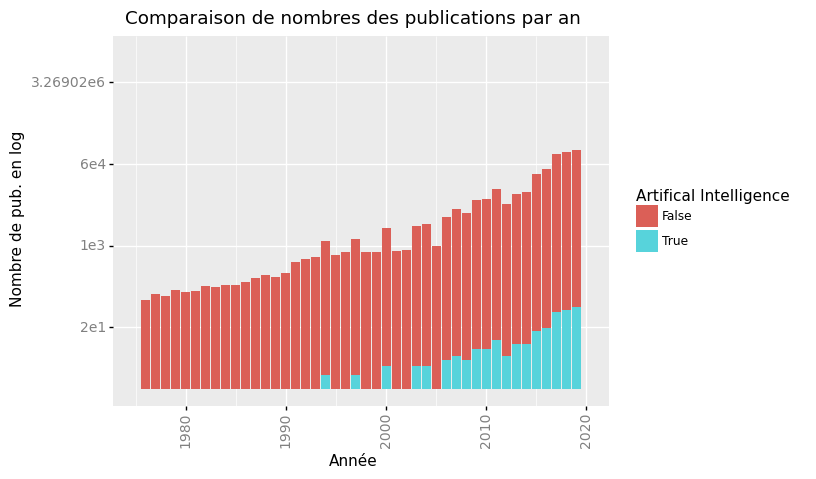

<ggplot: (8770314889009)>

In [142]:
import plotnine as p9
from plotnine import *
my_custom_theme = p9.theme(axis_text_x = p9.element_text(color="gray", size=10,
                                                         angle=90, hjust=.5),
                           axis_text_y = p9.element_text(color="gray", size=10))

#def func(counts, percentages):
#    return [f'{c} ({p}%) 'for c, p in zip(counts, percentages)]

(p9.ggplot(data = Pub_year,
           mapping=p9.aes(x='PY', fill='IA'))
    + p9.geom_bar()
    + my_custom_theme
    + ggtitle('Comparaison de nombres des publications par an')
    +scale_y_continuous(trans='log')
    +labs(y= "Nombre de pub. en log", x = "Année") 
    + labs(fill = "Artifical Intelligence")
    + xlim(1975, 2020)
)#pd.crosstab(df['Name'], df['Subject']).apply(lambda r: r/r.sum()*100, axis=1)


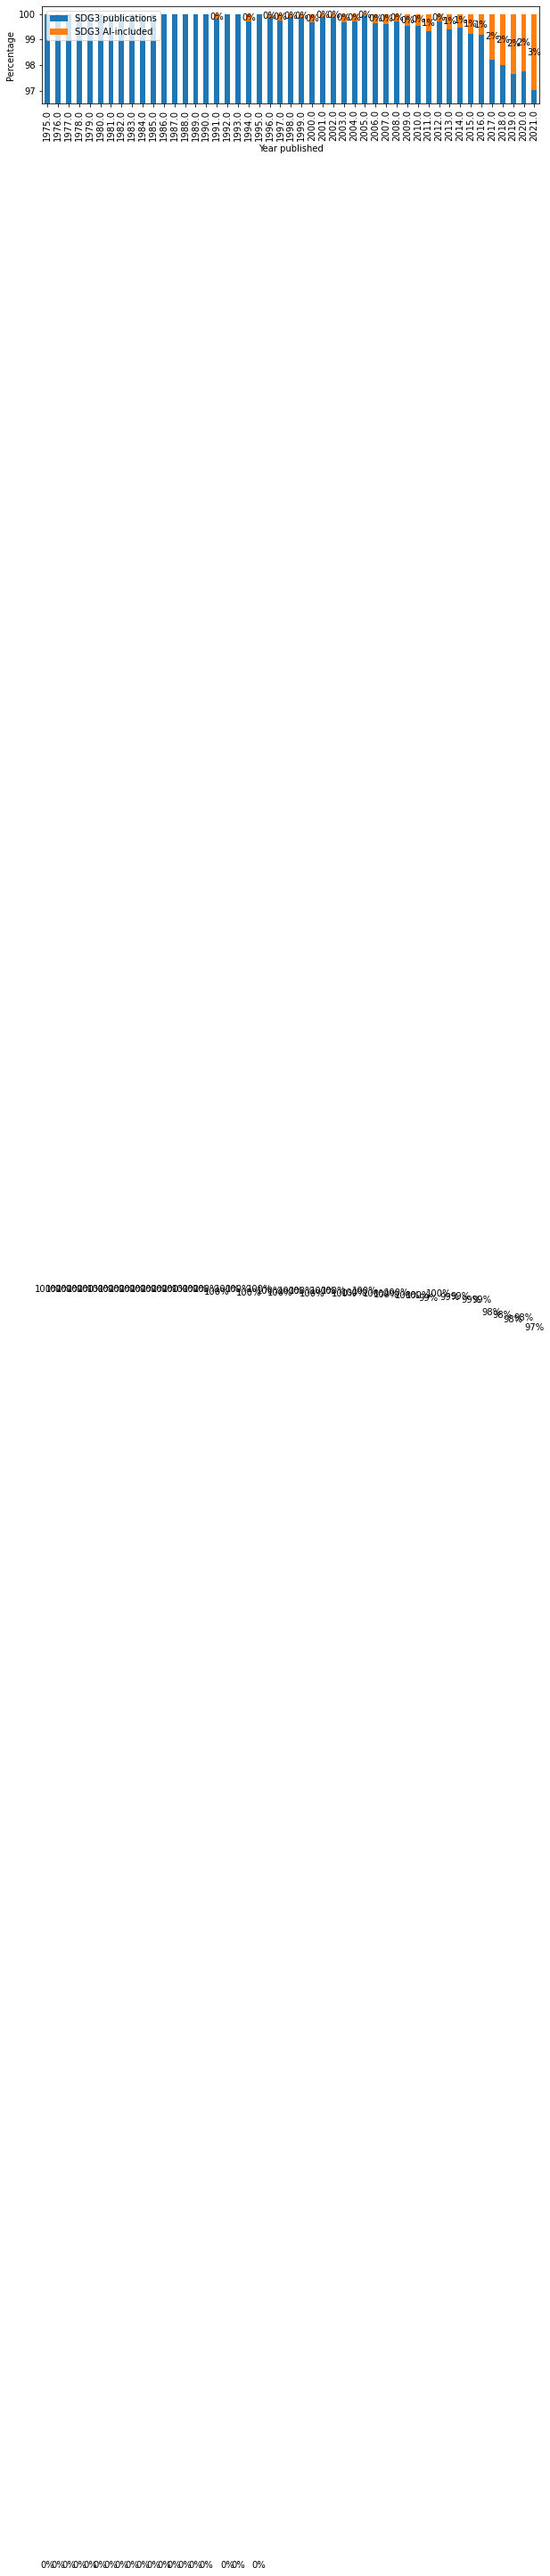

In [143]:
# crosstab
from decimal import *
import matplotlib.pyplot as plt
pal = ["royalblue", "dodgerblue", "lightskyblue", "lightblue"]
ax= pd.crosstab(text1['PY'][text1['PY'].between(1975, 2021)], text1['IA']).apply(lambda r: round(r/r.sum()*100,3), axis=1)
ax_1 = ax.plot.bar(figsize=(10,2),stacked=True, rot=0)
#display(ax)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Subject")

plt.xlabel('Year published')
plt.ylabel('Percentage')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='center')
plt.ylim((96.5,100.3))
plt.xticks(rotation=90)
L=plt.legend()
L.get_texts()[0].set_text('SDG3 publications')
L.get_texts()[1].set_text('SDG3 AI-included')


Text(0.5, 0, 'Pourcentage')

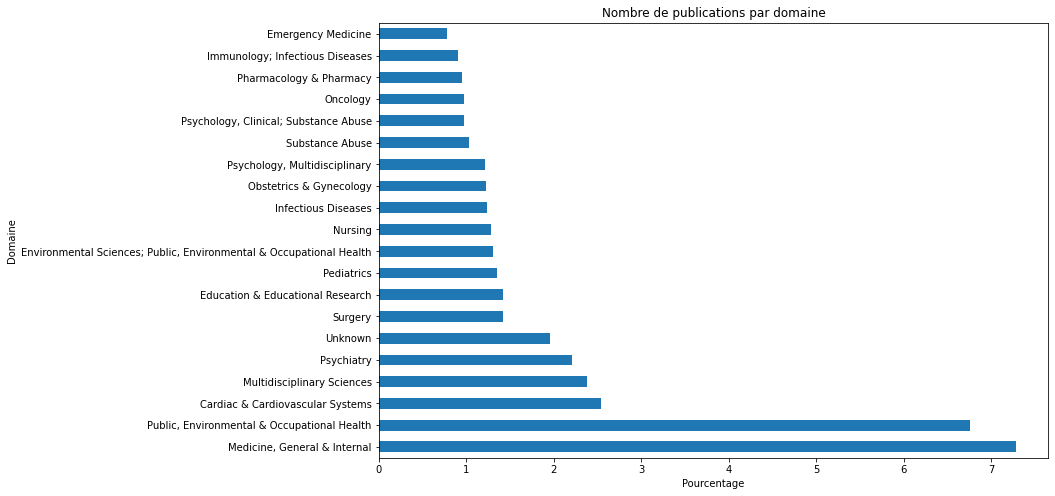

In [144]:
text['WC'][text['WC']=='WC']="Unknown"
text.rename(columns={"WC": "Unknown"})
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
jjj = text['WC'].value_counts()/len(text['WC'])*100
ax = jjj[:20].plot(kind='barh')
ax.set_title("Nombre de publications par domaine")
ax.set_ylabel("Domaine")
ax.set_xlabel("Pourcentage")

/var/folders/nz/9g2_qvwj45zb5v3jq0mdmhmr0000gn/T/ipykernel_67723/1232445581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 0, 'Pourcentage')

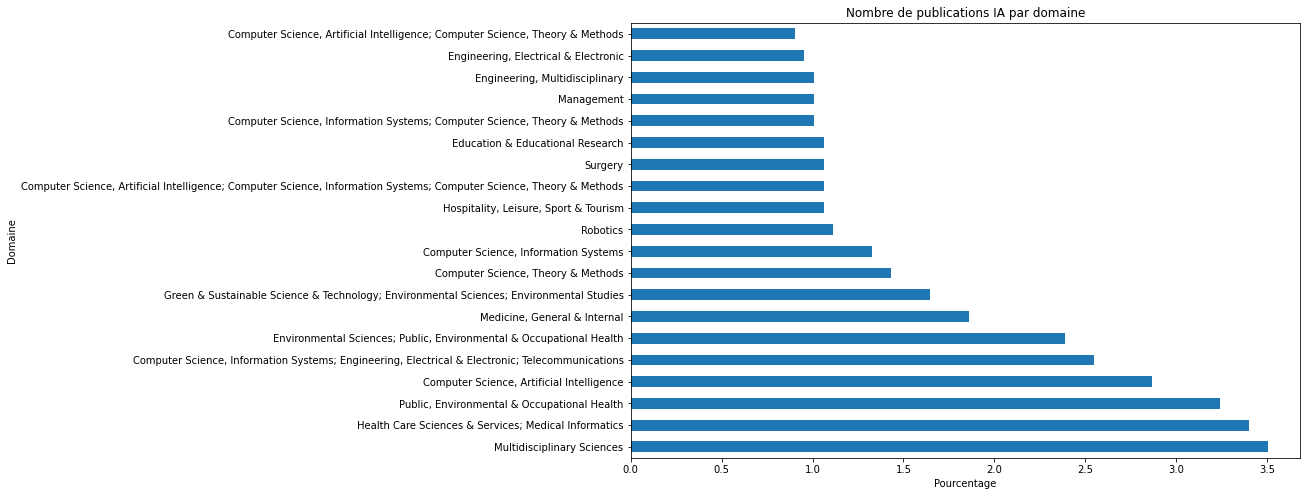

In [151]:
AI_count = text1[text1['IA']== True]
AI_count=AI_count.reset_index(drop=True)
AI_count['WC'][AI_count['WC']=='WC']="Unknown"
AI_count.rename(columns={"WC": "Unknown"})
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
jjj = AI_count['WC'].value_counts()/len(AI_count['WC'])*100
ax = jjj[:20].plot(kind='barh')
ax.set_title("Nombre de publications IA par domaine")
ax.set_ylabel("Domaine")
ax.set_xlabel("Pourcentage")

/var/folders/nz/9g2_qvwj45zb5v3jq0mdmhmr0000gn/T/ipykernel_67723/4208492600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0, 0.5, 'N° of citation in log.')

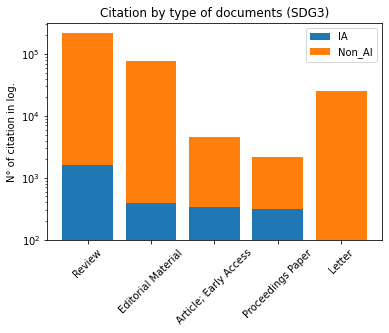

In [206]:
import numpy

total = len(text1['PI'])
text2 = np.full(total, np.nan)
text2 = text1.copy()
text1['Z9'][text['Z9']=='Z9']= np.NAN
text1['Z9'].fillna(0) 
text2['Z9'] = pd.to_numeric(text1['Z9'], errors='coerce')
text2['Z9'] =text2['Z9'].astype('int', errors='ignore')
text2['Z9']
agg_tips = text2.groupby(['DT', 'IA'])['Z9'].sum().unstack().fillna(0)
agg_tips
agg_tips = agg_tips.sort_values(True, ascending=False)[1:6]
agg_tips
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.bar(agg_tips.index, agg_tips[True], label='IA')
ax.bar(agg_tips.index, agg_tips[False], bottom=agg_tips[True],
       label='Non_AI')
plt.xticks(rotation=45)
ax.set_title('Citation by type of documents (SDG3)')
ax.legend()
ax.set_yscale('log')
ax.set_ylabel("N° of citation in log.")

Text(0.5, 0, 'Pourcentage')

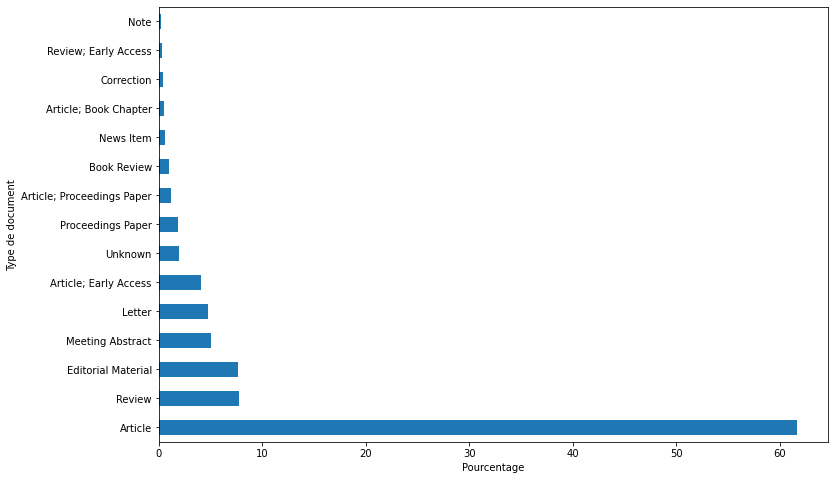

In [150]:
text['DT'][text['DT']=='DT']="Unknown"
text.rename(columns={"DT": "Unknown"})
plt.figure(figsize=(12, 8))
jjj = text['DT'].value_counts()/len(text['DT'])*100
ax = jjj[:15].plot(kind='barh')
ax.set_ylabel("Type de document")
ax.set_xlabel("Pourcentage")

In [145]:
from tqdm import tqdm
from geopy.geocoders import Nominatim
 
geolocator = Nominatim(user_agent = "geoapiExercises")
AI_count = text1[text1['IA']== True]
AI_count=AI_count.reset_index(drop=True)
total = len(AI_count['PI'])
AI_count['Latitude']= np.full(total, np.nan)
AI_count['Longitude']=np.full(total, np.nan)
with tqdm(total=total) as pbar:
    for index, item in AI_count['PI'].items():
        try:
            location = geolocator.geocode(item)
            AI_count['Latitude'][index] = location.latitude
            AI_count['Longitude'][index] = location.longitude
        except:
            AI_count['Latitude'][index] = np.nan
            AI_count['Longitude'][index] = np.nan
        pbar.update(1)
   
    

  0%|                                                  | 0/1883 [00:00<?, ?it/s]/var/folders/nz/9g2_qvwj45zb5v3jq0mdmhmr0000gn/T/ipykernel_67723/3668640840.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/nz/9g2_qvwj45zb5v3jq0mdmhmr0000gn/T/ipykernel_67723/3668640840.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  3%|█▏                                       | 54/1883 [00:27<18:00,  1.69it/s]/var/folders/nz/9g2_qvwj45zb5v3jq0mdmhmr0000gn/T/ipykernel_67723/3668640840.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

In [33]:
# Create a world map to show distributions of users 
#AI_count['Coord']= np.full(total, np.nan)
#AI_count['Coord'] = AI_count['Latitude'] + AI_count['Longitude']
#
#AI_count['Coord']
import folium
from folium.plugins import MarkerCluster
AI_count_non_nan1 = AI_count[AI_count['Latitude'].notna()]
AI_count_non_nan = AI_count_non_nan1[AI_count_non_nan1['Longitude'].notna()]
total = len(AI_count_non_nan['PI'])
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(total):
        lat = AI_count_non_nan.iloc[i]['Latitude']
        long = AI_count_non_nan.iloc[i]['Longitude']
        radius=5
        folium.CircleMarker(location = [lat, long], radius=radius, fill =True).add_to(marker_cluster)
#show the map
world_map.save("Map_SDG3.html")
world_map

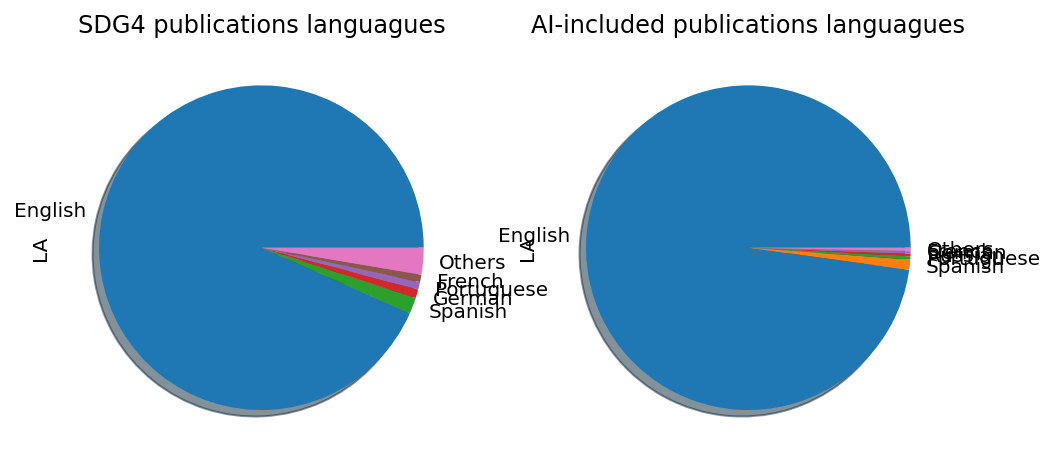

In [146]:
Lang = text1['LA'].value_counts()[0:6]
Lang["Others"] = text1['LA'].value_counts()[7:].sum()
Lang["Others"] = Lang["Others"] + Lang["LA"]
Lang["LA"] = 0

Lang1 = AI_count['LA'].value_counts()[0:6]
Lang1["Others"] = AI_count['LA'].value_counts()[7:].sum()
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,3),dpi=144)

ax1 = fig.add_subplot(121)

plot = Lang.plot.pie(y='hours', title="SDG4 publications languagues", legend=False, \
                   autopct=None, explode=None, \
                   shadow=True, startangle=0, figsize=(8, 8))

ax2 = fig.add_subplot(122)


plot = Lang1.plot.pie(y='hours', title="AI-included publications languagues", legend=False, \
                   autopct=None, explode=None, \
                   shadow=True, startangle=0, figsize=(8, 8))

plt.show()

In [ ]:
Moezzibadifrom PyPDF2 import PdfFileMerger
import os
os.chdir ("/Users/moezzibadi/Desktop/Tutoré/SDG4")

pdfs_list = os.listdir("/Users/moezzibadi/Desktop/Tutoré/SDG4")
merger = PdfFileMerger()
print (pdfs_list)

for file in pdfs_list:
    if file.endswith('pdf'):
        merger.append(file)

merger.write('/Users/moezzibadi/Desktop/Tutoré/SDG4/AI_pdf_final.pdf')
merger.close()

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  6 20:25:09 2021

@author: julianjm
"""

import os
os.chdir ("/Users/moezzibadi/Desktop/Tutoré/SDG4")
files_txt_list = os.listdir("/Users/moezzibadi/Desktop/Tutoré/SDG4")

with open('final_file.txt', 'w') as outfile:
    for file_name in files_txt_list:
        with open(file_name, encoding="utf-8", errors='ignore') as infile:
            for line in infile:
                outfile.write(line)

In [208]:
import numpy as np
import pandas as pd 
import os
import re
os.chdir ("/Users/moezzibadi/Desktop/Tutoré/SDG4")
text = pd.read_csv("final_file.txt", 
                  index_col=False , 
                  sep="\t", 
                  names=['PT','AU','BA','BE','GP','AF','BF','CA','TI','SO','SE','BS','LA','DT','CT','CY','CL','SP','HO','DE','ID','AB','C1','RP','EM','RI','OI','FU','FX','CR','NR','TC','Z9','U1','U2','PU','PI','PA','SN','EI','BN','J9','JI','PD','PY','VL','IS','PN','SU','SI','MA','BP','EP','AR','DI','D2','EA','PG','WC','SC','GA','UT','PM','OA','HC','HP','DA'])
text

,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,PG,WC,SC,GA,UT,PM,OA,HC,HP,DA
0,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,PG,WC,SC,GA,UT,PM,OA,HC,HP,DA
1,J,"Uysal, SA; Aki, E",NaN,NaN,NaN,"Uysal, Songul Atasavun; Aki, Esra",NaN,NaN,RELATIONSHIP BETWEEN WRITING SKILLS AND VISUAL...,PERCEPTUAL AND MOTOR SKILLS,...,9,"Psychology, Experimental",Psychology,005ST,WOS:000308770900010,23033749,NaN,NaN,NaN,2021-10-06
2,J,"Puerta, MJL; Artime, IH",NaN,NaN,NaN,"Llorente Puerta, Maria Jesus; Hevia Artime, Is...",NaN,NaN,Analysis of interactivity processes in knowled...,REVISTA DE EDUCACION,...,22,Education & Educational Research,Education & Educational Research,KH2CS,WOS:000510454400003,NaN,NaN,NaN,NaN,2021-10-06
3,J,"Verwiebe, R; Riederer, B",NaN,NaN,NaN,"Verwiebe, Roland; Riederer, Bernhard",NaN,NaN,The Reading Literacy of Immigrant Youth in Wes...,ZEITSCHRIFT FUR SOZIOLOGIE,...,21,Sociology,Sociology,175KN,WOS:000321229700002,NaN,NaN,NaN,NaN,2021-10-06
4,J,"Vieiro, P; Amboage, I",NaN,NaN,NaN,"Vieiro, Pilar; Amboage, Isabel",NaN,NaN,Relationship between word reading skills and r...,REVISTA DE INVESTIGACION EN LOGOPEDIA,...,21,Linguistics,Linguistics,DV4GW,WOS:000382884800001,NaN,NaN,NaN,NaN,2021-10-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101162,J,"Lundstrom, K; Diekema, AR; Leary, H; Haderlie,...",NaN,NaN,NaN,"Lundstrom, Kacy; Diekema, Anne R.; Leary, Heat...",NaN,NaN,TEACHING AND LEARNING INFORMATION SYNTHESIS An...,COMMUNICATIONS IN INFORMATION LITERACY,...,23,Information Science & Library Science,Information Science & Library Science,CP7ZY,WOS:000360110400006,NaN,"gold, Green Submitted",NaN,NaN,2021-10-06
101163,J,"Petersen, DB; Gillam, RB",NaN,NaN,NaN,"Petersen, Douglas B.; Gillam, Ronald B.",NaN,NaN,Predicting Reading Ability for Bilingual Latin...,JOURNAL OF LEARNING DISABILITIES,...,19,"Education, Special; Rehabilitation",Education & Educational Research; Rehabilitation,AW3IO,WOS:000346179900001,23629729,NaN,NaN,NaN,2021-10-06
101164,J,"Appanah, TM; Hoffman, N",NaN,NaN,NaN,"Appanah, Thangi M.; Hoffman, Nancy",NaN,NaN,USING SCAFFOLDED SELF-EDITING TO IMPROVE THE W...,AMERICAN ANNALS OF THE DEAF,...,15,"Education, Special; Rehabilitation",Education & Educational Research; Rehabilitation,CA8UN,WOS:000349196500003,25668994,NaN,NaN,NaN,2021-10-06
101165,C,"Amith, M; Tao, C",NaN,"Zheng, X; Zeng, D; Chen, H; Zhang, Y; Xing, C;...",NaN,"Amith, Muhammad; Tao, Cui",NaN,NaN,A Prototype Mobile Virtual Assistant for Seman...,"SMART HEALTH, ICSH 2014",...,6,"Computer Science, Information Systems; Compute...",Computer Science; Medical Informatics,BB9JD,WOS:000348361400021,NaN,NaN,NaN,NaN,2021-10-06


In [209]:
import numpy as np
searchfor = ['artificial intellig*', 'automated reasoning', 'autonomous vehicle*', 'backpropagation',\
             'big data', 'computer vision', 'data mining', 'data science', 'deep learning', 'expert system*',\
             'face detection','feature extraction', 'generative adversarial network*', 'gesture recognition',\
             'image classification', 'image recognition', 'image segmentation', 'information retrieval',\
             'intelligent machine*', 'kernel machine','knowledge representation', 'machine intelligence',\
             'machine learning', 'machine translation', 'meta-learning', 'multilayer perceptron*',\
             'natural language processing', 'neural net*', 'object detection', 'object identification',\
             'object recognition', 'pattern recognition', 'pose estimation', 'reinforcement learning', 'robot*',\
             'semantic search', 'semi-supervised learning', 'sentiment analysis', 'speech recognition',\
             'statistical learning', 'supervised learning', 'text classification', 'transfer learning',\
             'transformer network*', 'unsupervised learning', 'voice recognition']
subcol = text[['TI', 'AB', 'ID', 'DE']]

mask = np.column_stack([subcol[col].str.contains('|'.join(searchfor), case=False, na=False) for col in subcol])
bool_ = []
for s in mask:
    if (np.any(s)):
        bool_.append([True])
    else:
        bool_.append([False])

        import itertools
boolean=list(itertools.chain.from_iterable(bool_))
text[boolean]

,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,PG,WC,SC,GA,UT,PM,OA,HC,HP,DA
115,J,"Winter, J; Cotton, D; Hopkinson, P; Grant, V",NaN,NaN,NaN,"Winter, Jennie; Cotton, Debby; Hopkinson, Pete...",NaN,NaN,The university as a site for transformation ar...,INTERNATIONAL JOURNAL OF INNOVATION AND SUSTAI...,...,18,Green & Sustainable Science & Technology,Science & Technology - Other Topics,VD7EP,WOS:000437568000007,NaN,"Green Submitted, Green Accepted",NaN,NaN,2021-10-06
140,C,"Radhamani, R; Nizar, N; Kumar, D; Nair, B; Ach...",NaN,NaN,IEEE,"Radhamani, Rakhi; Nizar, Nijin; Kumar, Dhanush...",NaN,NaN,Low Cost Neuro-Inspired Robots for Sustainable...,2016 INTERNATIONAL CONFERENCE ON ROBOTICS AND ...,...,6,Automation & Control Systems; Robotics,Automation & Control Systems; Robotics,BH8ZE,WOS:000403770900001,NaN,NaN,NaN,NaN,2021-10-06
263,J,"Gross, D; Gross, K; Wilhelmy, S",NaN,NaN,NaN,"Gross, Dominik; Gross, Karin; Wilhelmy, Saskia",NaN,NaN,Digitalization in dentistry: ethical challenge...,QUINTESSENCE INTERNATIONAL,...,9,"Dentistry, Oral Surgery & Medicine","Dentistry, Oral Surgery & Medicine",JG3EC,WOS:000491956100009,31538146,NaN,NaN,NaN,2021-10-06
455,C,"Mathews, EC; Jackson, GT; Olney, A; Chipman, P...",NaN,"Callaos, N; Margenstern, M; Zhang, J; Castillo...",NaN,"Mathews, EC; Jackson, GT; Olney, A; Chipman, P...",NaN,NaN,Achieving domain independence in AutoTutor,"7TH WORLD MULTICONFERENCE ON SYSTEMICS, CYBERN...",...,5,"Computer Science, Artificial Intelligence; Com...",Computer Science; Telecommunications,BY46V,WOS:000189330600031,NaN,NaN,NaN,NaN,2021-10-06
473,C,"Al-Khazraji, S",NaN,NaN,ACM,"Al-Khazraji, Sedeeq",NaN,NaN,Using Data-Driven Approach for Modeling Timing...,ICMI'18: PROCEEDINGS OF THE 20TH ACM INTERNATI...,...,4,"Computer Science, Cybernetics; Computer Scienc...",Computer Science; Engineering,BL9OE,WOS:000457913100068,NaN,Bronze,NaN,NaN,2021-10-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101085,J,"Yichiet, A; Min, JKY; Lee, GM; Sheng, LJ",NaN,NaN,NaN,"Yichiet, Aun; Min, Jasmina Khaw Yen; Lee, Gan ...",NaN,NaN,Intent-Based Network Policy to Solution Archit...,INTERNATIONAL JOURNAL OF BUSINESS DATA COMMUNI...,...,20,"Computer Science, Information Systems",Computer Science,QG9VD,WOS:000617926700004,NaN,NaN,NaN,NaN,2021-10-06
101119,J,"Gentilin, O",NaN,NaN,NaN,"Gentilin, Olivetta",NaN,NaN,Integration of Computational Tools into Learni...,INFORMATION-WISSENSCHAFT UND PRAXIS,...,12,"Computer Science, Information Systems; Informa...",Computer Science; Information Science & Librar...,KC9CC,WOS:000507467500003,NaN,NaN,NaN,NaN,2021-10-06
101153,J,"Lee, YC",NaN,NaN,NaN,"Lee, Yeung Chung",NaN,NaN,Self-generated Analogical Models of Respirator...,JOURNAL OF BIOLOGICAL EDUCATION,...,15,Biology; Education & Educational Research; Edu...,Life Sciences & Biomedicine - Other Topics; Ed...,CX4OW,WOS:000365681200003,NaN,NaN,NaN,NaN,2021-10-06
101159,J,"Fadda, R",NaN,NaN,NaN,"Fadda, Roberta",NaN,NaN,"Social Learning, Narrative, and Construction o...",RIVISTA INTERNAZIONALE DI FILOSOFIA E PSICOLOGIA,...,10,"Philosophy; Psychology, Multidisciplinary",Philosophy; Psychology,CZ0YY,WOS:000366833800018,NaN,NaN,NaN,NaN,2021-10-06


In [210]:
text1 = text.copy()
text1['IA'] = boolean
text1['IA'] 

#Setting multiple items using a mask
text1['PY'][text['PY']=='PY']= np.NAN
text1['PY'].fillna("2040") 
text1['PY'] = pd.to_numeric(text1['PY'], errors='coerce')
Pub_year = text1.dropna(subset=['PY'])
Pub_year = Pub_year[Pub_year['PY']!= 'J']
Pub_year['PY'] =Pub_year['PY'].astype(int)
Pub_year


/var/folders/nz/9g2_qvwj45zb5v3jq0mdmhmr0000gn/T/ipykernel_67723/1058912106.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,WC,SC,GA,UT,PM,OA,HC,HP,DA,IA
1,J,"Uysal, SA; Aki, E",NaN,NaN,NaN,"Uysal, Songul Atasavun; Aki, Esra",NaN,NaN,RELATIONSHIP BETWEEN WRITING SKILLS AND VISUAL...,PERCEPTUAL AND MOTOR SKILLS,...,"Psychology, Experimental",Psychology,005ST,WOS:000308770900010,23033749,NaN,NaN,NaN,2021-10-06,False
2,J,"Puerta, MJL; Artime, IH",NaN,NaN,NaN,"Llorente Puerta, Maria Jesus; Hevia Artime, Is...",NaN,NaN,Analysis of interactivity processes in knowled...,REVISTA DE EDUCACION,...,Education & Educational Research,Education & Educational Research,KH2CS,WOS:000510454400003,NaN,NaN,NaN,NaN,2021-10-06,False
3,J,"Verwiebe, R; Riederer, B",NaN,NaN,NaN,"Verwiebe, Roland; Riederer, Bernhard",NaN,NaN,The Reading Literacy of Immigrant Youth in Wes...,ZEITSCHRIFT FUR SOZIOLOGIE,...,Sociology,Sociology,175KN,WOS:000321229700002,NaN,NaN,NaN,NaN,2021-10-06,False
4,J,"Vieiro, P; Amboage, I",NaN,NaN,NaN,"Vieiro, Pilar; Amboage, Isabel",NaN,NaN,Relationship between word reading skills and r...,REVISTA DE INVESTIGACION EN LOGOPEDIA,...,Linguistics,Linguistics,DV4GW,WOS:000382884800001,NaN,NaN,NaN,NaN,2021-10-06,False
5,J,"Cherodath, S; Singh, NC",NaN,NaN,NaN,"Cherodath, S.; Singh, N. C.",NaN,NaN,The influence of orthographic depth on reading...,BRAIN AND LANGUAGE,...,Audiology & Speech-Language Pathology; Linguis...,Audiology & Speech-Language Pathology; Linguis...,CF6IE,WOS:000352659600005,25747965,NaN,NaN,NaN,2021-10-06,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101162,J,"Lundstrom, K; Diekema, AR; Leary, H; Haderlie,...",NaN,NaN,NaN,"Lundstrom, Kacy; Diekema, Anne R.; Leary, Heat...",NaN,NaN,TEACHING AND LEARNING INFORMATION SYNTHESIS An...,COMMUNICATIONS IN INFORMATION LITERACY,...,Information Science & Library Science,Information Science & Library Science,CP7ZY,WOS:000360110400006,NaN,"gold, Green Submitted",NaN,NaN,2021-10-06,False
101163,J,"Petersen, DB; Gillam, RB",NaN,NaN,NaN,"Petersen, Douglas B.; Gillam, Ronald B.",NaN,NaN,Predicting Reading Ability for Bilingual Latin...,JOURNAL OF LEARNING DISABILITIES,...,"Education, Special; Rehabilitation",Education & Educational Research; Rehabilitation,AW3IO,WOS:000346179900001,23629729,NaN,NaN,NaN,2021-10-06,False
101164,J,"Appanah, TM; Hoffman, N",NaN,NaN,NaN,"Appanah, Thangi M.; Hoffman, Nancy",NaN,NaN,USING SCAFFOLDED SELF-EDITING TO IMPROVE THE W...,AMERICAN ANNALS OF THE DEAF,...,"Education, Special; Rehabilitation",Education & Educational Research; Rehabilitation,CA8UN,WOS:000349196500003,25668994,NaN,NaN,NaN,2021-10-06,False
101165,C,"Amith, M; Tao, C",NaN,"Zheng, X; Zeng, D; Chen, H; Zhang, Y; Xing, C;...",NaN,"Amith, Muhammad; Tao, Cui",NaN,NaN,A Prototype Mobile Virtual Assistant for Seman...,"SMART HEALTH, ICSH 2014",...,"Computer Science, Information Systems; Compute...",Computer Science; Medical Informatics,BB9JD,WOS:000348361400021,NaN,NaN,NaN,NaN,2021-10-06,True


/Users/moezzibadi/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_count : Removed 6690 rows containing non-finite values.
/Users/moezzibadi/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_bar : Removed 3 rows containing missing values.


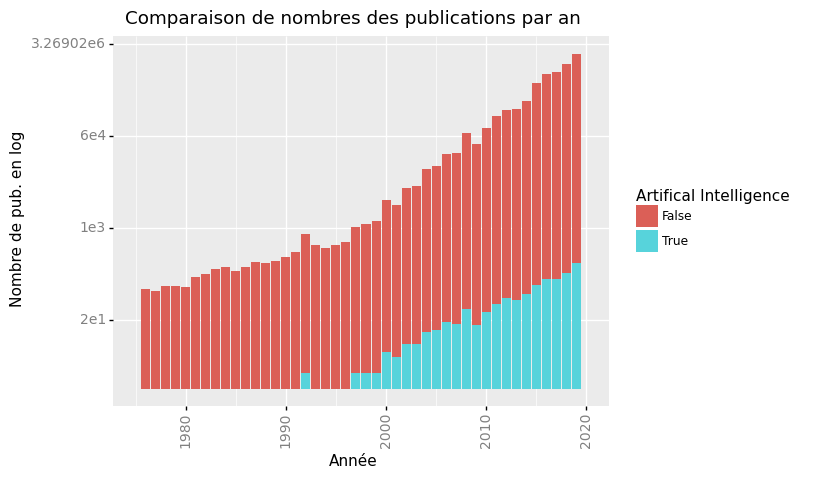

<ggplot: (8770204398020)>

In [211]:
import plotnine as p9
from plotnine import *
my_custom_theme = p9.theme(axis_text_x = p9.element_text(color="gray", size=10,
                                                         angle=90, hjust=.5),
                           axis_text_y = p9.element_text(color="gray", size=10))

#def func(counts, percentages):
#    return [f'{c} ({p}%) 'for c, p in zip(counts, percentages)]

(p9.ggplot(data = Pub_year,
           mapping=p9.aes(x='PY', fill='IA'))
    + p9.geom_bar()
    + my_custom_theme
    + ggtitle('Comparaison de nombres des publications par an')
    +scale_y_continuous(trans='log')
    +labs(y= "Nombre de pub. en log", x = "Année") 
    + labs(fill = "Artifical Intelligence")
    + xlim(1975, 2020)
)#pd.crosstab(df['Name'], df['Subject']).apply(lambda r: r/r.sum()*100, axis=1)
# Y est en log car la diff. entre lesz deux c'est enorme

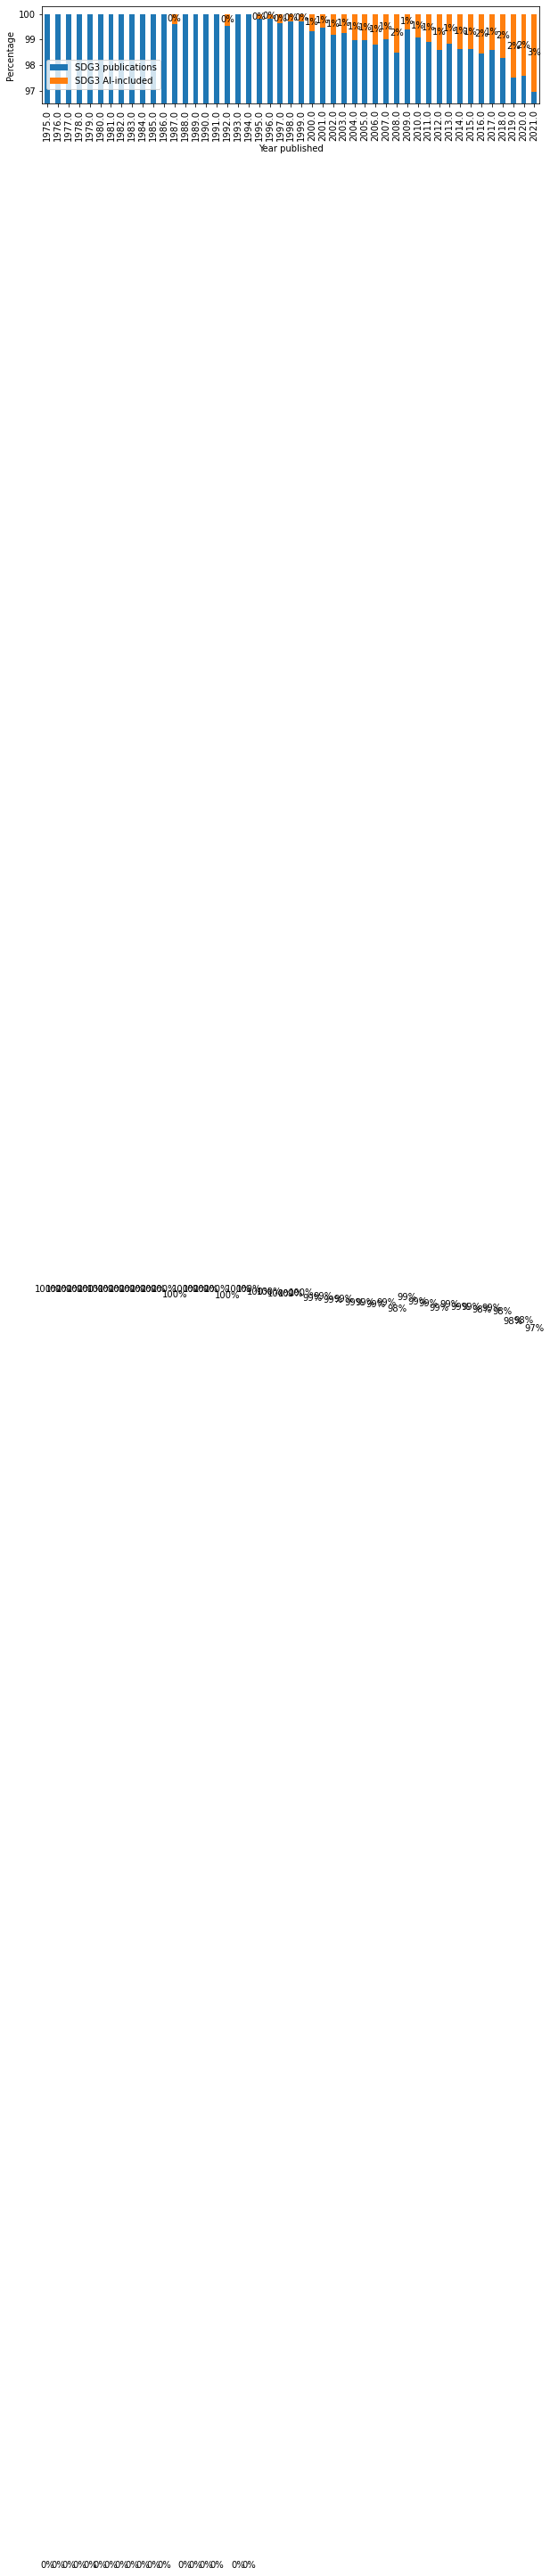

In [212]:
# crosstab
from decimal import *
pal = ["royalblue", "dodgerblue", "lightskyblue", "lightblue"]
ax= pd.crosstab(text1['PY'][text1['PY'].between(1975, 2021)], text1['IA']).apply(lambda r: round(r/r.sum()*100,3), axis=1)
ax_1 = ax.plot.bar(figsize=(10,2),stacked=True, rot=0)
#display(ax)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Subject")

plt.xlabel('Year published')
plt.ylabel('Percentage')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='center')
plt.ylim((96.5,100.3))
plt.xticks(rotation=90)
L=plt.legend(loc="upper left", bbox_to_anchor=(0.0,0.5))
L.get_texts()[0].set_text('SDG3 publications')
L.get_texts()[1].set_text('SDG3 AI-included')



Text(0.5, 0, 'Pourcentage')

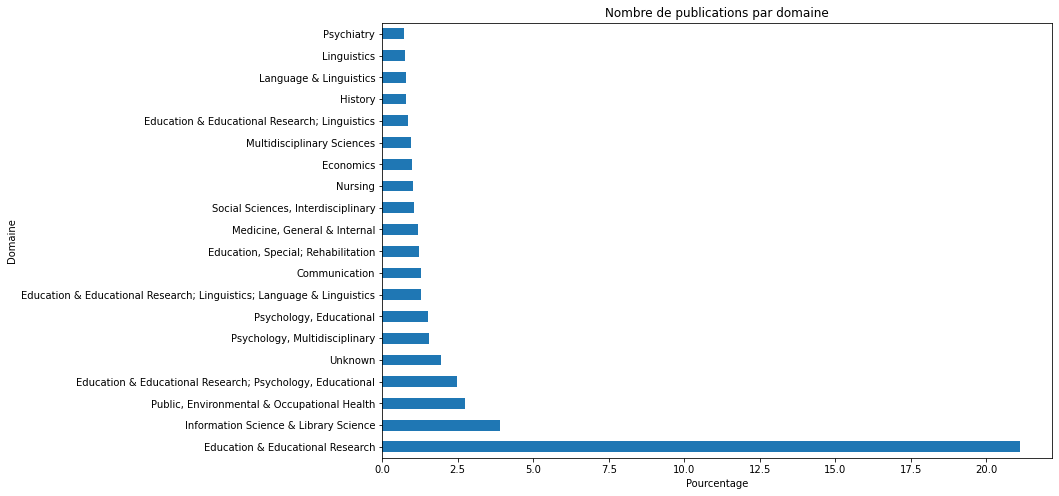

In [213]:
text['WC'][text['WC']=='WC']="Unknown"
text.rename(columns={"WC": "Unknown"})
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
jjj = text['WC'].value_counts()/len(text['WC'])*100
ax = jjj[:20].plot(kind='barh')
ax.set_title("Nombre de publications par domaine")
ax.set_ylabel("Domaine")
ax.set_xlabel("Pourcentage")

/var/folders/nz/9g2_qvwj45zb5v3jq0mdmhmr0000gn/T/ipykernel_67723/1232445581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 0, 'Pourcentage')

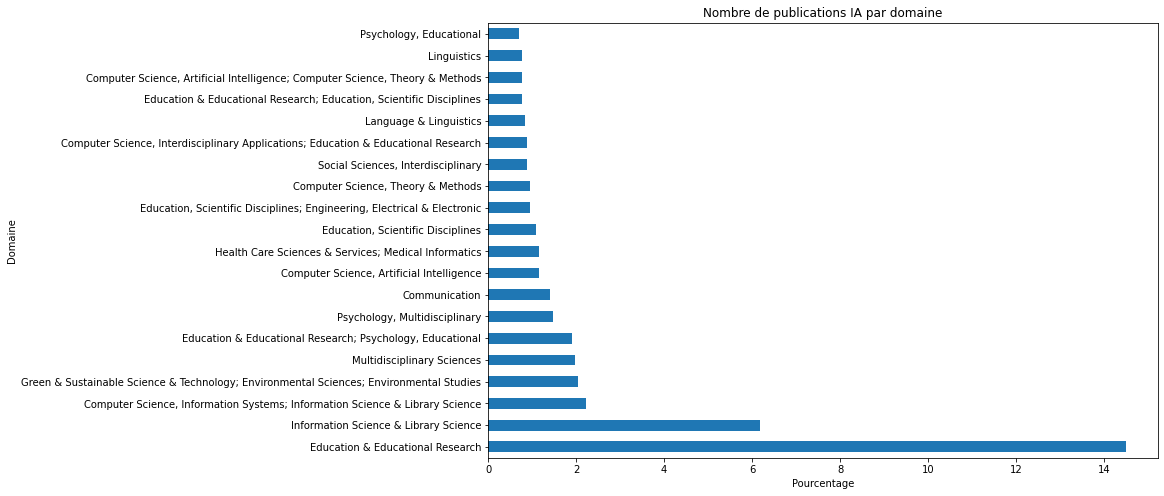

In [214]:
AI_count = text1[text1['IA']== True]
AI_count=AI_count.reset_index(drop=True)
AI_count['WC'][AI_count['WC']=='WC']="Unknown"
AI_count.rename(columns={"WC": "Unknown"})
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
jjj = AI_count['WC'].value_counts()/len(AI_count['WC'])*100
ax = jjj[:20].plot(kind='barh')
ax.set_title("Nombre de publications IA par domaine")
ax.set_ylabel("Domaine")
ax.set_xlabel("Pourcentage")

/var/folders/nz/9g2_qvwj45zb5v3jq0mdmhmr0000gn/T/ipykernel_67723/1745981574.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0, 0.5, 'N° of citation in log.')

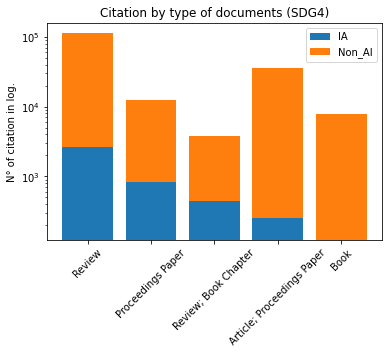

In [216]:
import numpy

total = len(text1['PI'])
text2 = np.full(total, np.nan)
text2 = text1.copy()
text1['Z9'][text['Z9']=='Z9']= np.NAN
text1['Z9'].fillna(0) 
text2['Z9'] = pd.to_numeric(text1['Z9'], errors='coerce')
text2['Z9'] =text2['Z9'].astype('int', errors='ignore')
text2['Z9']
agg_tips = text2.groupby(['DT', 'IA'])['Z9'].sum().unstack().fillna(0)
agg_tips
agg_tips = agg_tips.sort_values(True, ascending=False)[1:6]
agg_tips
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.bar(agg_tips.index, agg_tips[True], label='IA')
ax.bar(agg_tips.index, agg_tips[False], bottom=agg_tips[True],
       label='Non_AI')
plt.xticks(rotation=45)
ax.set_title('Citation by type of documents (SDG4)')
ax.legend()
ax.set_yscale('log')
ax.set_ylabel("N° of citation in log.")

Text(0.5, 0, 'Pourcentage')

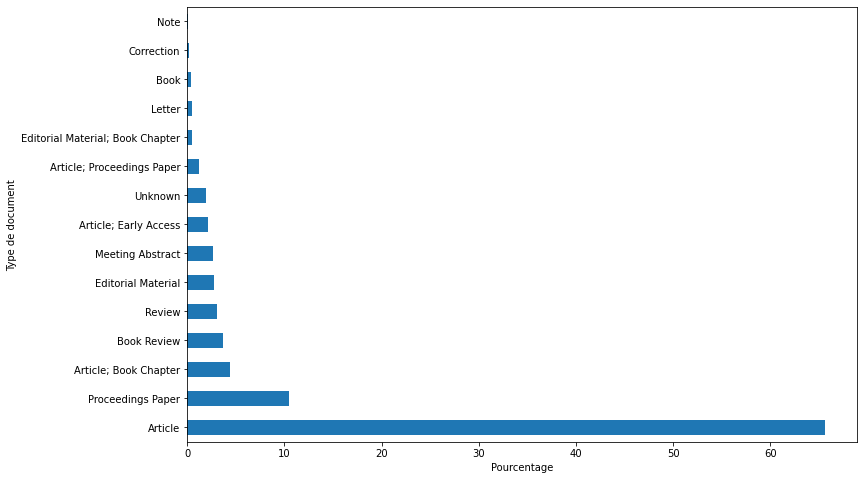

In [217]:
text['DT'][text['DT']=='DT']="Unknown"
text.rename(columns={"DT": "Unknown"})
plt.figure(figsize=(12, 8))
jjj = text['DT'].value_counts()/len(text['DT'])*100
ax = jjj[:15].plot(kind='barh')
ax.set_ylabel("Type de document")
ax.set_xlabel("Pourcentage")

In [40]:
from tqdm import tqdm
from geopy.geocoders import Nominatim
 
geolocator = Nominatim(user_agent = "geoapiExercises")
AI_count = text1[text1['IA']== True]
AI_count=AI_count.reset_index(drop=True)
total = len(AI_count['PI'])
AI_count['Latitude']= np.full(total, np.nan)
AI_count['Longitude']=np.full(total, np.nan)
with tqdm(total=total) as pbar:
    for index, item in AI_count['PI'].items():
        try:
            location = geolocator.geocode(item)
            AI_count['Latitude'][index] = location.latitude
            AI_count['Longitude'][index] = location.longitude
        except:
            AI_count['Latitude'][index] = np.nan
            AI_count['Longitude'][index] = np.nan
        pbar.update(1)
   
    

  0%|                                                  | 0/1573 [00:00<?, ?it/s]/var/folders/nz/9g2_qvwj45zb5v3jq0mdmhmr0000gn/T/ipykernel_67723/3668640840.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/nz/9g2_qvwj45zb5v3jq0mdmhmr0000gn/T/ipykernel_67723/3668640840.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 21%|████████▎                               | 326/1573 [02:43<10:35,  1.96it/s]/var/folders/nz/9g2_qvwj45zb5v3jq0mdmhmr0000gn/T/ipykernel_67723/3668640840.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

In [41]:
# Create a world map to show distributions of users 
#AI_count['Coord']= np.full(total, np.nan)
#AI_count['Coord'] = AI_count['Latitude'] + AI_count['Longitude']
#
#AI_count['Coord']
import folium
from folium.plugins import MarkerCluster
AI_count_non_nan1 = AI_count[AI_count['Latitude'].notna()]
AI_count_non_nan = AI_count_non_nan1[AI_count_non_nan1['Longitude'].notna()]
total = len(AI_count_non_nan['PI'])
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(total):
        lat = AI_count_non_nan.iloc[i]['Latitude']
        long = AI_count_non_nan.iloc[i]['Longitude']
        radius=5
        folium.CircleMarker(location = [lat, long], radius=radius, fill =True).add_to(marker_cluster)
#show the map
world_map.save("Map_SDG4.html")
world_map

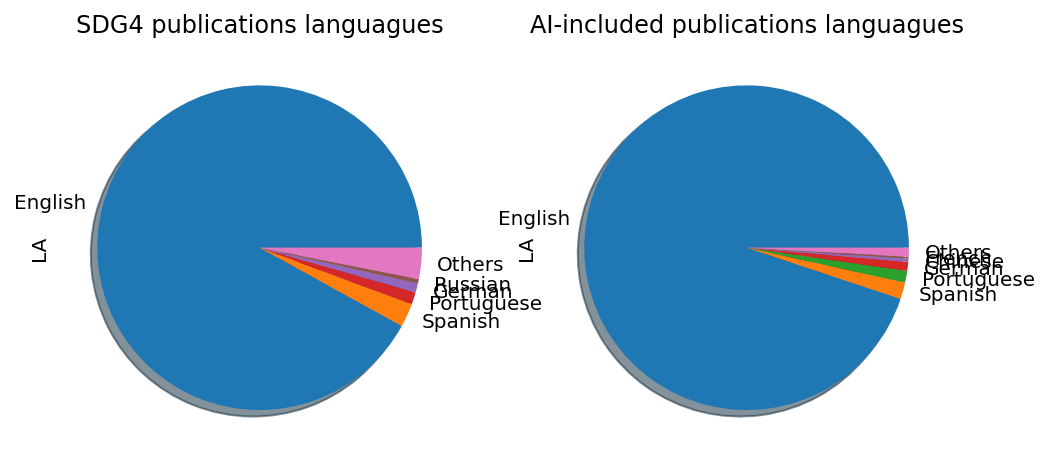

In [120]:
Lang = text1['LA'].value_counts()[0:6]
Lang["Others"] = text1['LA'].value_counts()[7:].sum()
Lang["Others"] = Lang["Others"] + Lang["LA"]
Lang["LA"] = 0

Lang1 = AI_count['LA'].value_counts()[0:6]
Lang1["Others"] = AI_count['LA'].value_counts()[7:].sum()
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,3),dpi=144)

ax1 = fig.add_subplot(121)

plot = Lang.plot.pie(y='hours', title="SDG4 publications languagues", legend=False, \
                   autopct=None, explode=None, \
                   shadow=True, startangle=0, figsize=(8, 8))

ax2 = fig.add_subplot(122)


plot = Lang1.plot.pie(y='hours', title="AI-included publications languagues", legend=False, \
                   autopct=None, explode=None, \
                   shadow=True, startangle=0, figsize=(8, 8))

plt.show()